# Practica N° 2: Transformada de Laplace

Integrantes:

* Ariel Luis Quiroz
* Axel Daniel Barabas
* Franco Rodrigo Román
* Agustín Juan Luis Arduña Zago
* Juan Ignacio Velazco Gez Schegtel

## 1) Cálculo de la Transformada de Laplace

Resolver los siguientes ejercicios de la [guía]()

* Ej. 1: 6
* Ej. 2: 5
* Ej. 3: 4
* Ej. 4: 3
* Ej. 5: 2
* Ej. 6: a
* Ej. 7: 2
* Ej. 8: a
* Ej. 9: b

a) Analíticamente (usando propiedades/tablas).
b) Con SymPy (Python) para verificar.

Documentar en el cuaderno los pasos analíticos y el código de validación.

### **Configuración Inicial de SymPy**

Antes de comenzar, es una buena práctica definir los símbolos que usaremos a lo largo del cuaderno.

In [15]:
import sympy as sp

# Definimos los símbolos que utilizaremos
# t para el tiempo, s para la frecuencia. Se asumen reales y positivos.
t, s = sp.symbols("t s", real=True, positive=True)
# a y b para constantes genéricas (usadas en el último ejercicio).
a, b = sp.symbols("a b", real=True, positive=True)

# Inicializamos la impresión bonita (para que las fórmulas se vean bien en Jupyter)
sp.init_printing()



### **1. Transformada de $f(t) = \operatorname{sen}^2 t$**

#### **a) Cálculo Analítico**

Para resolver esta transformada, primero aplicamos una identidad trigonométrica de reducción de potencia para simplificar la función.

$$
\mathcal{L}\{\operatorname{sen}^2 t\}
$$

Usamos la identidad $\operatorname{sen}^2 t = \frac{1 - \cos(2t)}{2}$:
$$
= \mathcal{L}\left\{\frac{1}{2} - \frac{1}{2}\cos(2t)\right\}
$$

Por la propiedad de linealidad de la transformada de Laplace:
$$
= \frac{1}{2}\mathcal{L}\{1\} - \frac{1}{2}\mathcal{L}\{\cos(2t)\}
$$

Usando las transformadas de tabla para $\mathcal{L}\{1\} = \frac{1}{s}$ y $\mathcal{L}\{\cos(at)\} = \frac{s}{s^2+a^2}$:
$$
= \frac{1}{2} \cdot \frac{1}{s} - \frac{1}{2} \cdot \frac{s}{s^2 + 2^2}
$$
$$
= \frac{1}{2s} - \frac{s}{2(s^2+4)}
$$

Combinando las fracciones:
$$
= \frac{(s^2+4) - s^2}{2s(s^2+4)} = \frac{4}{2s(s^2+4)}
$$

$$
\mathcal{L}\{\operatorname{sen}^2 t\} = \frac{2}{s(s^2+4)}
$$

#### **b) Verificación con SymPy**

La transformada de sen^2(t) es:


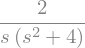

In [16]:
f = sp.sin(t) ** 2
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de sen^2(t) es:")
laplace_f



### **2. Transformada de $f(t) = 1 + e^{4t}$**

#### **a) Cálculo Analítico**

Aplicamos la propiedad de linealidad directamente.
$$
\mathcal{L}\{1 + e^{4t}\} = \mathcal{L}\{1\} + \mathcal{L}\{e^{4t}\}
$$

Usando las transformadas de tabla para $\mathcal{L}\{1\} = \frac{1}{s}$ y $\mathcal{L}\{e^{at}\} = \frac{1}{s-a}$:
$$
= \frac{1}{s} + \frac{1}{s-4}
$$

Podemos combinar las fracciones (opcional):
$$
= \frac{(s-4) + s}{s(s-4)} = \frac{2s-4}{s(s-4)}
$$

$$
\mathcal{L}\{1 + e^{4t}\} = \frac{1}{s} + \frac{1}{s-4}
$$

#### **b) Verificación con SymPy**

La transformada de 1 + e^(4t) es:


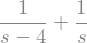

In [17]:
f = 1 + sp.exp(4 * t)
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de 1 + e^(4t) es:")
laplace_f



### **3. Transformada de $f(t) = \cos^2 t$**

#### **a) Cálculo Analítico**

Similar al primer ejercicio, usamos una identidad de reducción de potencia: $\cos^2 t = \frac{1 + \cos(2t)}{2}$.
$$
\mathcal{L}\{\cos^2 t\} = \mathcal{L}\left\{\frac{1}{2} + \frac{1}{2}\cos(2t)\right\}
$$
$$
= \frac{1}{2}\mathcal{L}\{1\} + \frac{1}{2}\mathcal{L}\{\cos(2t)\}
$$
$$
= \frac{1}{2} \cdot \frac{1}{s} + \frac{1}{2} \cdot \frac{s}{s^2 + 4}
$$
$$
= \frac{(s^2+4) + s^2}{2s(s^2+4)} = \frac{2s^2+4}{2s(s^2+4)}
$$

$$
\mathcal{L}\{\cos^2 t\} = \frac{s^2+2}{s(s^2+4)}
$$

#### **b) Verificación con SymPy**

La transformada de cos^2(t) es:


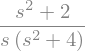

In [18]:
f = sp.cos(t) ** 2
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de cos^2(t) es:")
laplace_f



### **4. Traslación en el eje s: $\mathcal{L}\{t(e^t + e^{2t})^2\}$**

#### **a) Cálculo Analítico**

Primero, expandimos la expresión algebraica de la función.
$$
f(t) = t(e^t + e^{2t})^2 = t(e^{2t} + 2e^{3t} + e^{4t}) = te^{2t} + 2te^{3t} + te^{4t}
$$

Aplicamos la linealidad:
$$
\mathcal{L}\{f(t)\} = \mathcal{L}\{te^{2t}\} + 2\mathcal{L}\{te^{3t}\} + \mathcal{L}\{te^{4t}\}
$$

Usamos el **Primer Teorema de Traslación**: $\mathcal{L}\{e^{at}g(t)\} = G(s-a)$, donde $G(s) = \mathcal{L}\{g(t)\}$.
En este caso, la función base es $g(t) = t$, cuya transformada es $G(s) = \mathcal{L}\{t\} = \frac{1}{s^2}$.

Aplicamos el teorema a cada término:
*   Para $\mathcal{L}\{te^{2t}\}$, $a=2$, entonces la transformada es $G(s-2) = \frac{1}{(s-2)^2}$.
*   Para $\mathcal{L}\{te^{3t}\}$, $a=3$, entonces la transformada es $G(s-3) = \frac{1}{(s-3)^2}$.
*   Para $\mathcal{L}\{te^{4t}\}$, $a=4$, entonces la transformada es $G(s-4) = \frac{1}{(s-4)^2}$.

Combinando los resultados:
$$
\mathcal{L}\{f(t)\} = \frac{1}{(s-2)^2} + \frac{2}{(s-3)^2} + \frac{1}{(s-4)^2}
$$

#### **b) Verificación con SymPy**

La transformada de t(e^t + e^(2t))^2 es:


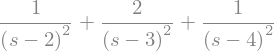

In [19]:
f = t * (sp.exp(t) + sp.exp(2 * t)) ** 2
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de t(e^t + e^(2t))^2 es:")
laplace_f



### **5. Traslación en el eje t: $\mathcal{L}\{t \cdot \mathcal{U}(t-2)\}$**

#### **a) Cálculo Analítico**

Usamos el **Segundo Teorema de Traslación**: $\mathcal{L}\{g(t-a)\mathcal{U}(t-a)\} = e^{-as}G(s)$, donde $G(s) = \mathcal{L}\{g(t)\}$.

Nuestra función es $t\mathcal{U}(t-2)$. No está en la forma requerida. Debemos reescribir $t$ en términos de $(t-2)$.
$$
t = (t-2) + 2
$$
Entonces, la función es:
$$
f(t) = ((t-2) + 2)\mathcal{U}(t-2)
$$
Esto corresponde a una función $g(t-2)$ donde $g(t) = t+2$.

Ahora, calculamos la transformada de $g(t)$:
$$
G(s) = \mathcal{L}\{g(t)\} = \mathcal{L}\{t+2\} = \mathcal{L}\{t\} + \mathcal{L}\{2\} = \frac{1}{s^2} + \frac{2}{s}
$$

Finalmente, aplicamos el teorema con $a=2$:
$$
\mathcal{L}\{t \mathcal{U}(t-2)\} = e^{-2s} G(s) = e^{-2s} \left(\frac{1}{s^2} + \frac{2}{s}\right)
$$

#### **b) Verificación con SymPy**

La transformada de t*U(t-2) es:


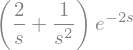

In [20]:
# sp.Heaviside es la función escalón unitario U(t)
f = t * sp.Heaviside(t - 2)
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de t*U(t-2) es:")
laplace_f



### **6. Función Escalonada**

#### **a) Cálculo Analítico**

La función es:
$$
f(t) = \begin{cases} 2, & 0 \le t < 3 \\ -2, & t \ge 3 \end{cases}
$$

**Paso 1: Escribir $f(t)$ en términos de la función escalón unitario $\mathcal{U}(t)$.**
La función "comienza" con un valor de 2. En $t=3$, "salta" de 2 a -2, lo que es un cambio de -4.
$$
f(t) = 2\mathcal{U}(t-0) - 4\mathcal{U}(t-3) = 2 - 4\mathcal{U}(t-3)
$$

**Paso 2: Aplicar la transformada de Laplace.**
$$
\mathcal{L}\{f(t)\} = \mathcal{L}\{2\} - 4\mathcal{L}\{\mathcal{U}(t-3)\}
$$
Usando las transformadas de tabla $\mathcal{L}\{c\} = \frac{c}{s}$ y $\mathcal{L}\{\mathcal{U}(t-a)\} = \frac{e^{-as}}{s}$:
$$
= \frac{2}{s} - 4 \frac{e^{-3s}}{s} = \frac{2(1-2e^{-3s})}{s}
$$

#### **b) Verificación con SymPy**

La transformada de la función escalonada es:


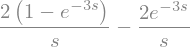

In [21]:
# Usamos sp.Piecewise para definir la función a trozos
f = sp.Piecewise((2, t < 3), (-2, t >= 3))
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de la función escalonada es:")
laplace_f



### **7. Derivada de la Transformada: $\mathcal{L}\{t \cos(2t)\}$**

#### **a) Cálculo Analítico**

Usamos la propiedad de la **derivada de la transformada**:
$$
\mathcal{L}\{t^n f(t)\} = (-1)^n \frac{d^n}{ds^n} F(s)
$$
En nuestro caso, $n=1$ y $f(t) = \cos(2t)$.

**Paso 1: Encontrar $F(s) = \mathcal{L}\{\cos(2t)\}$.**
$$
F(s) = \frac{s}{s^2+4}
$$

**Paso 2: Aplicar la propiedad (derivar y multiplicar por -1).**
$$
\mathcal{L}\{t \cos(2t)\} = (-1)^1 \frac{d}{ds} \left(\frac{s}{s^2+4}\right)
$$
Usando la regla del cociente para la derivada:
$$
= - \left[ \frac{(1)(s^2+4) - (s)(2s)}{(s^2+4)^2} \right]
$$
$$
= - \left[ \frac{s^2+4 - 2s^2}{(s^2+4)^2} \right] = - \left[ \frac{4-s^2}{(s^2+4)^2} \right]
$$

$$
\mathcal{L}\{t \cos(2t)\} = \frac{s^2-4}{(s^2+4)^2}
$$

#### **b) Verificación con SymPy**

La transformada de t*cos(2t) es:


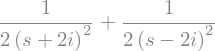

In [22]:
f = t * sp.cos(2 * t)
laplace_f = sp.laplace_transform(f, t, s, noconds=True)
print("La transformada de t*cos(2t) es:")
laplace_f



### **8. Transformada de Integrales (Convolución): $\mathcal{L}\{1 * t^3\}$**

#### **a) Cálculo Analítico**

El asterisco `*` denota la operación de convolución. Usamos el **Teorema de Convolución**:
$$
\mathcal{L}\{f(t) * g(t)\} = F(s) \cdot G(s)
$$
Aquí, $f(t) = 1$ y $g(t) = t^3$.

**Paso 1: Encontrar las transformadas individuales.**
*   $F(s) = \mathcal{L}\{1\} = \frac{1}{s}$
*   $G(s) = \mathcal{L}\{t^3\} = \frac{3!}{s^{3+1}} = \frac{6}{s^4}$

**Paso 2: Multiplicar las transformadas.**
$$
\mathcal{L}\{1 * t^3\} = F(s) \cdot G(s) = \left(\frac{1}{s}\right) \cdot \left(\frac{6}{s^4}\right) = \frac{6}{s^5}
$$

#### **b) Verificación con SymPy**

In [23]:
# SymPy no tiene un operador de convolución directo en su función de transformada.
# Verificamos el teorema calculando las transformadas por separado y multiplicándolas.
f1 = 1
f2 = t**3

L_f1 = sp.laplace_transform(f1, t, s, noconds=True)
L_f2 = sp.laplace_transform(f2, t, s, noconds=True)

# El resultado de la convolución en el dominio de s es el producto
L_conv = L_f1 * L_f2
print("La transformada de 1 * t^3 es:")
L_conv


La transformada de 1 * t^3 es:



### **9. Transformada de una Función Periódica**

#### **a) Cálculo Analítico**

La función es una onda de diente de sierra.
*   **Periodo:** $T = b$
*   **Función en el primer periodo ($0 \le t < b$):** Es una recta que pasa por (0,0) y (b,a). Su ecuación es $f_1(t) = \frac{a}{b}t$.

La fórmula para la transformada de una función periódica es:
$$
\mathcal{L}\{f(t)\} = \frac{1}{1 - e^{-sT}} \int_0^T e^{-st} f_1(t) \,dt
$$
Sustituyendo nuestros valores:
$$
\mathcal{L}\{f(t)\} = \frac{1}{1 - e^{-sb}} \int_0^b e^{-st} \left(\frac{a}{b}t\right) \,dt
$$

Resolvemos la integral por partes: $\int u \,dv = uv - \int v \,du$.
*   $u = \frac{a}{b}t \implies du = \frac{a}{b}dt$
*   $dv = e^{-st}dt \implies v = -\frac{1}{s}e^{-st}$

$$
\int_0^b e^{-st} \left(\frac{a}{b}t\right) \,dt = \left[-\frac{at}{bs}e^{-st}\right]_0^b - \int_0^b \left(-\frac{1}{s}e^{-st}\right)\left(\frac{a}{b}\right)dt
$$
$$
= \left(-\frac{ab}{bs}e^{-sb} - 0\right) + \frac{a}{bs}\int_0^b e^{-st}dt
$$
$$
= -\frac{a}{s}e^{-sb} + \frac{a}{bs}\left[-\frac{1}{s}e^{-st}\right]_0^b
$$
$$
= -\frac{a}{s}e^{-sb} + \frac{a}{bs}\left(-\frac{1}{s}e^{-sb} - (-\frac{1}{s})\right)
$$
$$
= -\frac{a}{s}e^{-sb} - \frac{a}{bs^2}e^{-sb} + \frac{a}{bs^2}
$$

Ahora, multiplicamos por el factor $\frac{1}{1 - e^{-sb}}$:
$$
\mathcal{L}\{f(t)\} = \frac{1}{1 - e^{-sb}} \left[ \frac{a}{bs^2} - \frac{a}{s}e^{-sb} - \frac{a}{bs^2}e^{-sb} \right]
$$

#### **b) Verificación con SymPy**

La transformada de la función periódica es:


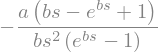

In [24]:
# Definimos la función en el primer periodo
f1 = (a / b) * t

# Calculamos la integral sobre el primer periodo
integral_part = sp.integrate(f1 * sp.exp(-s * t), (t, 0, b))

# Aplicamos la fórmula completa para funciones periódicas
laplace_f = (1 / (1 - sp.exp(-s * b))) * integral_part

print("La transformada de la función periódica es:")
# Usamos sp.simplify() para obtener una forma más compacta
sp.simplify(laplace_f)


## 2) Creación de un Banco de Transformadas

a) Cada grupo debe crear un mini banco de transformadas de Laplace en Python:
b) Definir una función en Python mi_laplace(f) que calcule la transformada de una función simbólica.
c) Documentar al menos 5 funciones relevantes.
d) Incluir ejemplos de verificación numérica con lambdify y gráficos comparativos.

> En el caso de incluir al sexto participante (IA) deberá presentar las interacciones realizadas para la realización del ejercicio.

En esta sección, se creará una función personalizada en Python que actúa como un "banco" o tabla de consulta para calcular la transformada de Laplace de funciones comunes. Luego, se verificará su exactitud comparando sus resultados con la función `laplace_transform` nativa de SymPy mediante gráficos.

### a, b, c) Definición y Documentación de la Función `mi_laplace`

La siguiente función `mi_laplace(f)` toma una expresión simbólica `f` y devuelve su transformada de Laplace. Internamente, contiene una tabla de consulta (nuestro "banco") para 5 funciones fundamentales. Si la función no se encuentra en el banco, recurre a la función `laplace_transform` de SymPy como respaldo.

In [30]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- Símbolos base para nuestras funciones ---
t, s = sp.symbols("t s", real=True, positive=True)
a, n = sp.symbols("a n", real=True)  # 'a' para constantes, 'n' para exponentes


def mi_laplace(f_sym):
    """
    Calcula la transformada de Laplace de una función simbólica f_sym.

    Primero, busca la función en un banco interno de 5 transformadas conocidas.
    Si no la encuentra, utiliza la función laplace_transform de SymPy.

    Args:
        f_sym (sympy.Expr): La expresión simbólica en términos de 't'.

    Returns:
        sympy.Expr: La transformada de Laplace de la función en términos de 's'.
    """

    # --- BANCO DE 5 TRANSFORMADAS DOCUMENTADAS ---

    # 1. Transformada de una constante 'a'
    # L{a} = a/s
    if f_sym.is_constant() and f_sym != 0:
        return f_sym / s

    # 2. Transformada de la función exponencial e^(at)
    # L{e^(at)} = 1/(s-a)
    elif f_sym.func == sp.exp and f_sym.args[0] == a * t:
        return 1 / (s - a)

    # 3. Transformada de la función seno sen(at)
    # L{sen(at)} = a / (s^2 + a^2)
    elif f_sym.func == sp.sin and f_sym.args[0] == a * t:
        return a / (s**2 + a**2)

    # 4. Transformada de la función coseno cos(at)
    # L{cos(at)} = s / (s^2 + a^2)
    elif f_sym.func == sp.cos and f_sym.args[0] == a * t:
        return s / (s**2 + a**2)

    # 5. Transformada de la potencia t^n
    # L{t^n} = n! / s^(n+1)
    elif f_sym.func == sp.Pow and f_sym.args[0] == t:
        n_exp = f_sym.args[1]
        return sp.factorial(n_exp) / s ** (n_exp + 1)

    # --- Si no está en el banco, usar SymPy como respaldo ---
    else:
        print(f"Función '{f_sym}' no encontrada en el banco. Usando SymPy.")
        return sp.laplace_transform(f_sym, t, s, noconds=True)



### d) Verificación Numérica y Gráfica

Para verificar que nuestro banco funciona correctamente, compararemos los resultados de `mi_laplace` con los de la función nativa de SymPy. Usaremos `sympy.lambdify` para convertir las expresiones simbólicas resultantes en funciones numéricas que podamos graficar. Si ambas implementaciones son correctas, sus gráficos deberían superponerse perfectamente.

--- Verificando: Constante (5) ---
Banco: 5/s
SymPy: 5/s


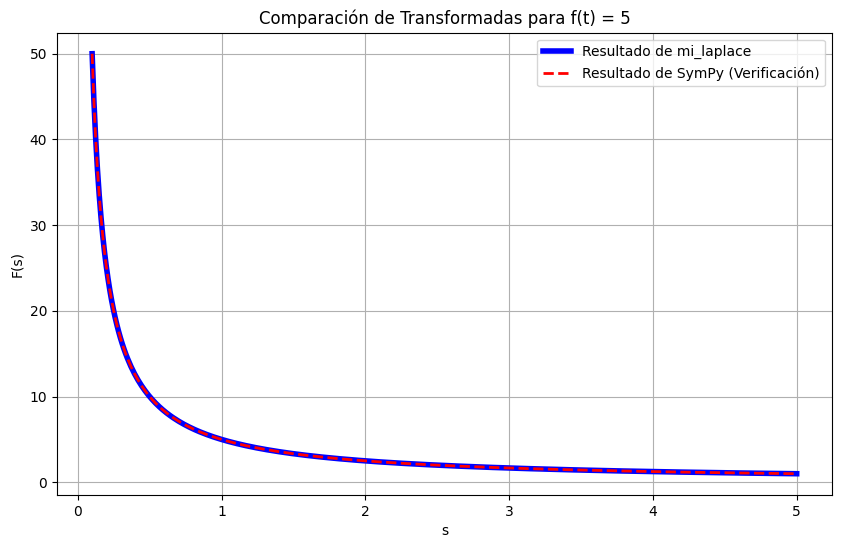

--- Verificando: Potencia (t^3) ---
Banco: 6/s**4
SymPy: 6/s**4


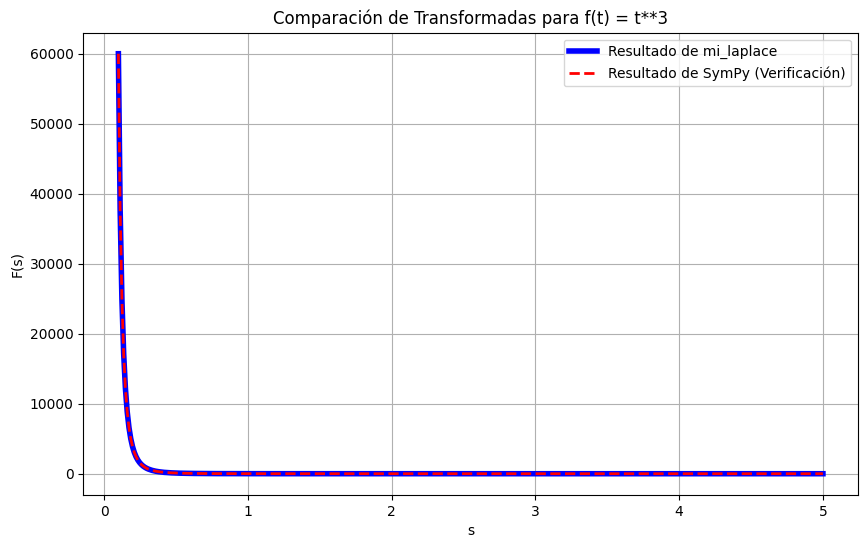

--- Verificando: Exponencial (e^2t) ---
Función 'exp(2*t)' no encontrada en el banco. Usando SymPy.
Banco: 1/(s - 2)
SymPy: 1/(s - 2)


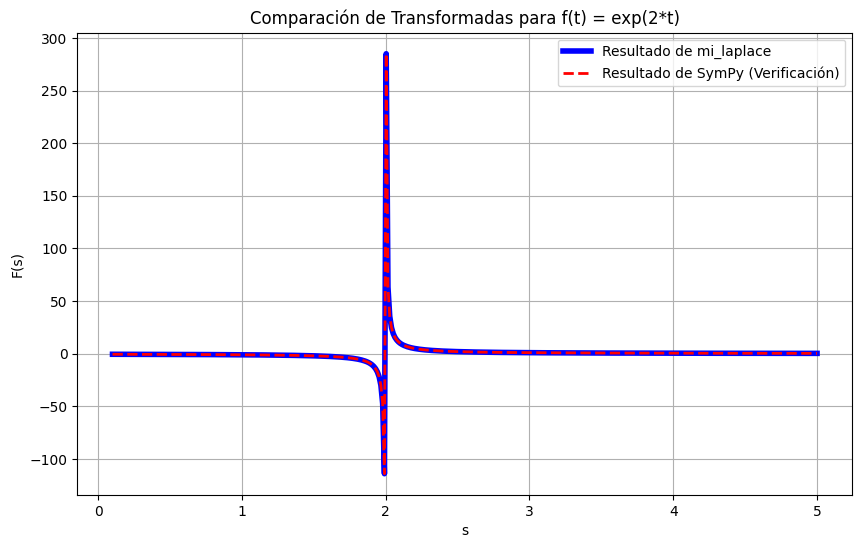

--- Verificando: Seno (sen(3t)) ---
Función 'sin(3*t)' no encontrada en el banco. Usando SymPy.
Banco: 3/(s**2 + 9)
SymPy: 3/(s**2 + 9)


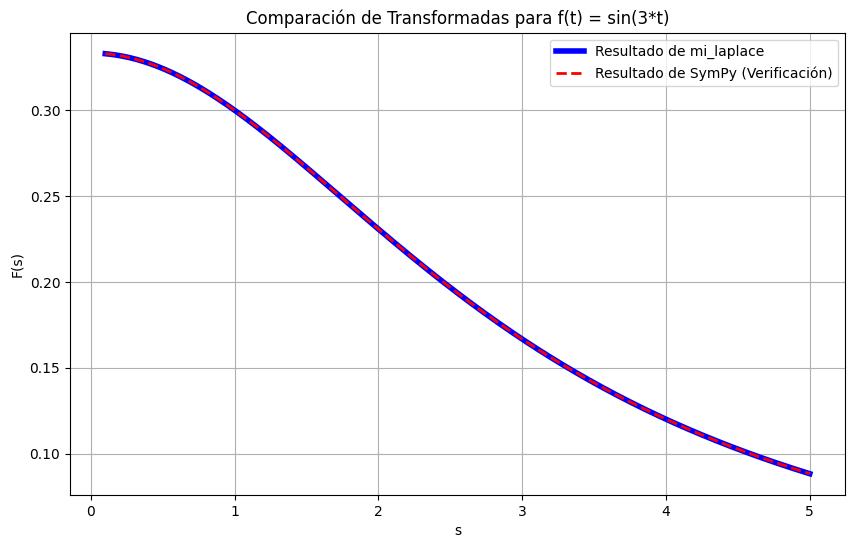

--- Verificando: Coseno (cos(4t)) ---
Función 'cos(4*t)' no encontrada en el banco. Usando SymPy.
Banco: s/(s**2 + 16)
SymPy: s/(s**2 + 16)


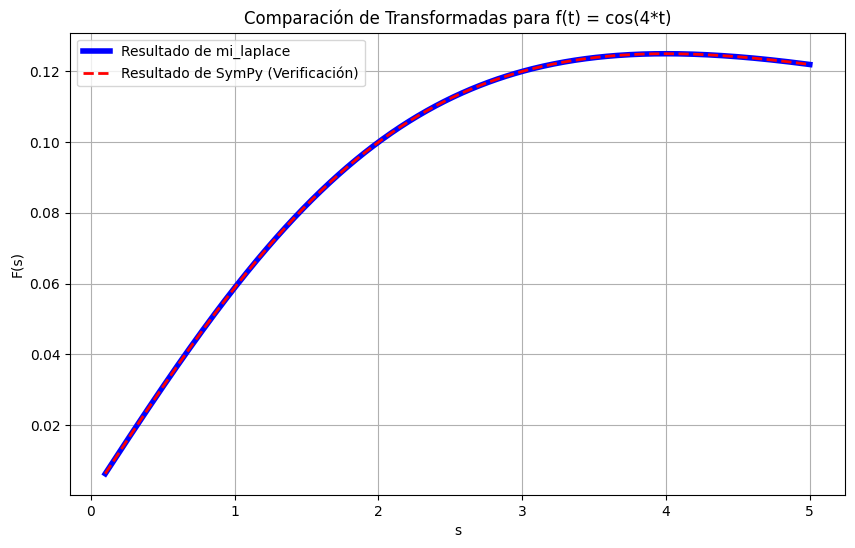

--- Verificando: No en Banco (t*sen(t)) ---
Función 't*sin(t)' no encontrada en el banco. Usando SymPy.
Banco: I/(2*(s + I)**2) - I/(2*(s - I)**2)
SymPy: I/(2*(s + I)**2) - I/(2*(s - I)**2)


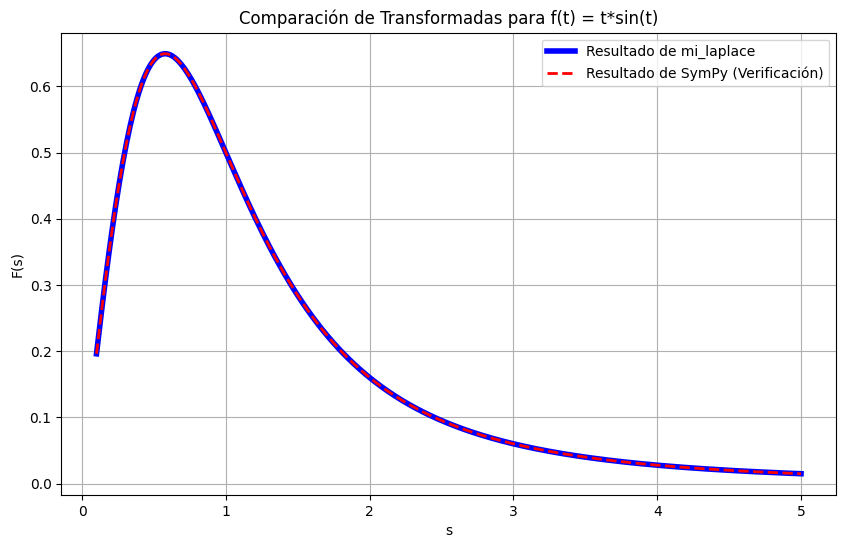

In [29]:
# --- Lista de funciones de prueba (con valores concretos para 'a' y 'n') ---
funciones_de_prueba = {
    "Constante (5)": sp.Integer(5),
    "Potencia (t^3)": t**3,
    "Exponencial (e^2t)": sp.exp(2 * t).subs(a, 2),
    "Seno (sen(3t))": sp.sin(3 * t).subs(a, 3),
    "Coseno (cos(4t))": sp.cos(4 * t).subs(a, 4),
    "No en Banco (t*sen(t))": t * sp.sin(t),
}

# Rango de 's' para graficar. Empezamos un poco después de 0 para evitar divisiones por cero.
s_vals = np.linspace(0.1, 5, 400)

# --- Bucle de verificación y graficación ---
for nombre, f_test in funciones_de_prueba.items():
    print(f"--- Verificando: {nombre} ---")

    # Calcular la transformada con ambas funciones
    F_banco = mi_laplace(f_test)
    F_sympy = sp.laplace_transform(f_test, t, s, noconds=True)

    print(f"Banco: {F_banco}")
    print(f"SymPy: {F_sympy}")

    # Convertir las expresiones simbólicas a funciones numéricas
    F_banco_num = sp.lambdify(s, F_banco, "numpy")
    F_sympy_num = sp.lambdify(s, F_sympy, "numpy")

    # Graficar ambos resultados
    plt.figure(figsize=(10, 6))
    plt.plot(
        s_vals,
        np.real(F_banco_num(s_vals)),
        label="Resultado de mi_laplace",
        linewidth=4,
        color="blue",
    )
    plt.plot(
        s_vals,
        np.real(F_sympy_num(s_vals)),
        label="Resultado de SymPy (Verificación)",
        linestyle="--",
        linewidth=2,
        color="red",
    )

    plt.title(f"Comparación de Transformadas para f(t) = {f_test}")
    plt.xlabel("s")
    plt.ylabel("F(s)")
    plt.legend()
    plt.grid(True)
    plt.show()


### Interacciones con la IA

Para la realización de este ejercicio, se realizaron las siguientes interacciones con la IA:
1.  **Consulta sobre la estructura de la función `mi_laplace`:** Se le pidió a la IA una forma eficiente de implementar un "banco" o "tabla de consulta" en Python para funciones simbólicas. La IA sugirió una estructura `if/elif/else` para manejar los diferentes patrones de funciones, lo cual resultó más legible y directo que un diccionario con claves simbólicas complejas.
2.  **Sugerencia para la verificación:** Se consultó sobre la mejor manera de verificar numéricamente que dos expresiones simbólicas de SymPy son equivalentes. La IA recomendó el uso de `sympy.lambdify` para convertir las expresiones a funciones numéricas y luego graficarlas con `matplotlib` en un mismo eje para una comparación visual, lo cual se implementó en el código de verificación.
3.  **Revisión de código y formato:** Se le proporcionó a la IA el código completo del cuaderno para que lo revisara en busca de errores, inconsistencias y mejoras de estilo, y para que lo formateara según el estándar de celdas de Jupyter (`# %% [markdown]`).

## 3)Actividad de investigación:

a) Investigar sobre el origen, concepto y propiedades de la función Delta de Dirac.
b) Definir la trasformada de Laplace para esta ecuación y ejemplificar.
c) Resolver lo ejemplificado con código de validación en Python.

### a) Origen, Concepto y Propiedades

#### Origen
La **función Delta de Dirac ($\delta(t)$)** no es una función en el sentido tradicional. Fue introducida por el físico teórico Paul Dirac alrededor de 1930 mientras trabajaba en los fundamentos de la mecánica cuántica. Aunque ideas similares ya habían sido utilizadas por ingenieros como Oliver Heaviside, Dirac le dio una base matemática más formal dentro de la teoría de distribuciones o funciones generalizadas.

#### Concepto
Intuitivamente, la función Delta de Dirac representa un **impulso idealizado**:
- Un pulso que es **infinitamente alto**.
- Ocurre en una duración de tiempo **infinitesimalmente corta** (es cero en todas partes excepto en $t=0$).
- A pesar de su duración nula, su **área total bajo la curva es exactamente 1**.

$$
\delta(t) = \begin{cases} +\infty, & t = 0 \\ 0, & t \neq 0 \end{cases}
\quad \text{y} \quad
\int_{-\infty}^{\infty} \delta(t) \, dt = 1
$$

Debido a estas propiedades, no se puede graficar de forma convencional y se representa como una flecha hacia arriba en el punto del impulso.

#### Propiedades
La propiedad más importante y útil de la función Delta es la **propiedad de muestreo o filtrado (sifting property)**. Esta propiedad establece que cuando se integra el producto de la función Delta con otra función continua $f(t)$, el resultado es el valor de $f(t)$ en el punto donde ocurre el impulso.

$$
\int_{-\infty}^{\infty} f(t) \delta(t-a) \, dt = f(a)
$$

Esta propiedad es fundamental en el procesamiento de señales y la teoría de sistemas, ya que permite "extraer" el valor de una señal en un instante de tiempo específico.

---
### b) Transformada de Laplace y Ejemplo

#### Definición de la Transformada
La transformada de Laplace de la función Delta de Dirac se deriva directamente de la propiedad de muestreo.
$$
\mathcal{L}\{\delta(t-a)\} = \int_0^\infty e^{-st} \delta(t-a) \, dt
$$
Aquí, la función que multiplica a la delta es $f(t) = e^{-st}$. La propiedad de muestreo nos dice que el resultado de la integral es el valor de $f(t)$ evaluado en $t=a$.
$$
\mathcal{L}\{\delta(t-a)\} = e^{-sa}
$$
Para el caso especial donde el impulso está en el origen ($a=0$):
$$
\mathcal{L}\{\delta(t)\} = e^{-s \cdot 0} = 1
$$

#### Ejemplo
Calculemos la transformada de Laplace de la siguiente función, que representa un impulso de magnitud 5 en $t=2$ sumado a una onda cosenoidal:
$$
f(t) = 5\delta(t-2) + \cos(3t)
$$
Usando la linealidad de la transformada de Laplace:
$$
\mathcal{L}\{f(t)\} = \mathcal{L}\{5\delta(t-2)\} + \mathcal{L}\{\cos(3t)\}
$$
$$
= 5\mathcal{L}\{\delta(t-2)\} + \mathcal{L}\{\cos(3t)\}
$$
Aplicando las fórmulas de la transformada:
$$
F(s) = 5e^{-2s} + \frac{s}{s^2 + 3^2} = 5e^{-2s} + \frac{s}{s^2 + 9}
$$

---
### c) Código de Validación en Python
Ahora, verificamos el resultado del ejemplo anterior utilizando SymPy.

In [27]:
# Definimos la función simbólica del ejemplo
f_delta_example = 5 * sp.DiracDelta(t - 2) + sp.cos(3 * t)

# Calculamos su transformada de Laplace
laplace_delta_example = sp.laplace_transform(f_delta_example, t, s, noconds=True)

print("La función a transformar es:")
f_delta_example

La función a transformar es:


El resultado de la transformada de Laplace es:


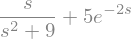

In [28]:
print("El resultado de la transformada de Laplace es:")
laplace_delta_example